# Labirynt
***
<img src="maze.png">

In [1]:
import time
import queue
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [2]:
"""
> 0 - ściana
> 1 - pole
"""
maze = [[0,0,0,0,0,0,0,0,0,0,0,0],
        [0,1,1,1,0,1,1,1,0,1,1,0],
        [0,0,0,1,1,1,0,1,0,0,1,0],
        [0,1,1,1,0,1,0,1,1,1,1,0],
        [0,1,0,1,0,0,0,1,0,0,1,0],
        [0,1,1,0,0,1,1,1,0,1,1,0],
        [0,1,1,1,1,1,0,1,1,1,0,0],
        [0,1,0,1,1,0,0,1,0,1,1,0],
        [0,1,0,0,0,1,1,1,0,0,1,0],
        [0,1,0,1,0,0,1,0,1,0,1,0],
        [0,1,0,1,1,1,1,1,1,1,1,0],
        [0,0,0,0,0,0,0,0,0,0,0,0]]

START_LOCATION = [1,1]
END_LOCATION = [10,10]

### Przeszukiwanie wszerz
---

In [3]:
maze2 = [["#","#","#","#","#","#","#","#","#","#","#","#"],
        ["#"," "," "," ","#"," "," "," ","#"," "," ","#"],
        ["#","#","#"," "," "," ","#"," ","#","#"," ","#"],
        ["#"," "," "," ","#"," ","#"," "," "," "," ","#"],
        ["#"," ","#"," ","#","#","#"," ","#","#"," ","#"],
        ["#"," "," ","#","#"," "," "," ","#"," "," ","#"],
        ["#"," "," "," "," "," ","#"," "," "," ","#","#"],
        ["#"," ","#"," "," ","#","#"," ","#"," "," ","#"],
        ["#"," ","#","#","#"," "," "," ","#","#"," ","#"],
        ["#"," ","#"," ","#","#"," ","#"," ","#"," ","#"],
        ["#"," ","#"," "," "," "," "," "," "," "," ","#"],
        ["#","#","#","#","#","#","#","#","#","#","#","#"]]

def printMaze(maze, path=""):
    i = 1
    j = 1
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(maze):
        for i, col in enumerate(row):
            if (j, i) in pos:
                print("- ", end="")
            else:
                print(col + " ", end="")
        print()
        
def isNotPrevious(move, last):
    if move == "L" and last == "R":
        return False

    elif move == "R" and last == "L":
        return False

    elif move == "D" and last == "U":
        return False

    elif move == "U" and last == "D":
        return False
    
    return True

def valid(maze, moves):
    i = 1
    j = 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(maze[0]) and 0 <= j < len(maze)):
            return False
        elif (maze[j][i] == "#"):
            return False

    return True


def findEnd(maze, moves):
    i = 1
    j = 1
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if i == 10 and j == 10:
        print("Found: " + moves)
        printMaze(maze, moves)
        return True

    return False


nums = queue.Queue()
nums.put("")
add = ""
i=0

start_time = time.time()
while not findEnd(maze2, add): 
    i += 1
    add = nums.get()
    for j in ["L", "R", "U", "D"]:
        if len(add) > 0:
            last = add[-1]
        else:
            last = None
        put = add + j
        if valid(maze2, put) and isNotPrevious(j, last):
            nums.put(put)
exec_time_bfs = round((time.time() - start_time), 4)
print("Tries: ", i)

Found: RRDRRURRDDDDDRRDRDDD
# # # # # # # # # # # # 
#   - - # - - - #     # 
# # # - - - # - # #   # 
#       #   # -       # 
#   #   # # # - # #   # 
#     # #     - #     # 
#           # - - - # # 
#   #     # #   # - - # 
#   # # #       # # - # 
#   #   # #   #   # - # 
#   #               - # 
# # # # # # # # # # # # 
Tries:  296


### Metoda brute-force
---

In [4]:
def brute(n):
    allMoves = []
    start_time = time.time()
    for i in range(n):
        moves = []
        currLoc = [1,1]
        
        for j in range(40):
            move = random.randint(0,4)
            
            # PASS 
            if move == 0:
                continue 

            # UP
            elif move == 1:
                if maze[currLoc[0]-1][currLoc[1]] == 0:
                    continue
                currLoc = [currLoc[0]-1, currLoc[1]]

            # DOWN
            elif move == 2:
                if maze[currLoc[0]+1][currLoc[1]] == 0:
                    continue            
                currLoc = [currLoc[0]+1, currLoc[1]]  

            # RIGHT
            elif move == 3:
                if maze[currLoc[0]][currLoc[1]+1] == 0:
                    continue
                currLoc = [currLoc[0], currLoc[1]+1]   

            # LEFT
            elif move == 4:
                if maze[currLoc[0]][currLoc[1]-1] == 0:
                    continue
                currLoc = [currLoc[0], currLoc[1]-1]   

        # CALCULATE EUCLIDEAN DISTANCE
        x = currLoc[0] - END_LOCATION[0]
        y = currLoc[1] - END_LOCATION[1]
        
        distance = math.sqrt(x ** 2 + y ** 2)
        allMoves.append(distance)
        
    return allMoves

start_time = time.time()
a = brute(300000)
brute_exec_time = time.time() - start_time
found_brute = np.min(a) == 0

# Algorytm genetyczny
---

In [5]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

### Struktura chromosomu
***
Chromosom jest ciągiem o długości 40. Każdy element moze mieć wartość od 0 do 4 i odpowiada zachowaniu w labiryncie:
- 0 - pozostanie w miejscu
- 1 - ruch w górę
- 2 - ruch w dół
- 3 - ruch w prawo
- 4 - ruch w lewo

Chromosom jest tym lepszy im bliżej wyjścia znajduje się jego punkt końcowy oraz im mniej błędów popełni.

In [6]:
toolbox = base.Toolbox()
toolbox.register("attr_int", random.choice, [0, 1, 2, 3, 4])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=40)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

### Funkcja fitness v.1
***
Funkcja ocenia chromosom na podstawie:
- długości euklidesowej między jego punktem końcowym a punktem wyjścia 
- otrzymanch kar

Chromosom jest karany za każdy ruch w ścianę lub cofnięcie się do poprzedniego pola.
***
Ostateczna ocena chromosomu jest obliczana wg wzoru:

$$ocena = -1 * (eukl.- \frac{1}{kary+1}\ )$$


In [7]:
def evalMazeEuclidean(individual):
    penalties = 0
    currLoc = [1,1]
    lastMove = None
    
    for move in individual:
        # PASS 
        if move == 0:
            continue 
            
        # UP
        elif move == 1:
            if maze[currLoc[0]-1][currLoc[1]] == 0 or lastMove == 1:
                penalties += 1
                continue
            currLoc = [currLoc[0]-1, currLoc[1]]
            lastMove = 2
                       
        # DOWN
        elif move == 2:
            if maze[currLoc[0]+1][currLoc[1]] == 0 or lastMove == 2:
                penalties += 1
                continue            
            currLoc = [currLoc[0]+1, currLoc[1]]  
            lastMove = 1
 
        # RIGHT
        elif move == 3:
            if maze[currLoc[0]][currLoc[1]+1] == 0 or lastMove == 3:
                penalties += 1
                continue
            currLoc = [currLoc[0], currLoc[1]+1]   
            lastMove = 4
            
        # LEFT
        elif move == 4:
            if maze[currLoc[0]][currLoc[1]-1] == 0 or lastMove == 4:
                penalties += 1
                continue
            currLoc = [currLoc[0], currLoc[1]-1]   
            lastMove = 3
    
    # CALCULATE EUCLIDEAN DISTANCE
    x = currLoc[0] - END_LOCATION[0]
    y = currLoc[1] - END_LOCATION[1]
    
    distance = math.sqrt(x**2 + y**2)
    
    # CALCULATE VALUE 
    value = -(distance - 1/(penalties + 1))
    return value,

In [8]:
# chrom1= toolbox.individual()
# chrom2 = [0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 3, 0, 3, 2, 3, 0, 2, 0, 0, 2, 2]
# print(chrom1)
# print(evalMazeEuclidean(chrom1))
# print(chrom2)
# print(evalMazeEuclidean(chrom2))

### Funkcja fitness v.2 
***
Funkcja ocenia chromosom na podstawie:
- odległości taskówkowej między jego punktem końcowym a punktem wyjścia 
- otrzymanch kar

Chromosom jest karany za każdy ruch w ścianę lub cofnięcie się do poprzedniego pola.
***
Ostateczna ocena chromosomu jest obliczana wg wzoru:

$$ocena = -1 * (taxicab- \frac{1}{kary+1}\ )$$


In [9]:
def evalMazeTaxicab(individual):
    penalties = 0
    currLoc = [1,1]
    lastMove = None
    
    for move in individual:
        # PASS 
        if move == 0:
            continue 
            
        # UP
        elif move == 1:
            if maze[currLoc[0]-1][currLoc[1]] == 0 or lastMove == 1:
                penalties += 1
                continue
            currLoc = [currLoc[0]-1, currLoc[1]]
            lastMove = 2
                       
        # DOWN
        elif move == 2:
            if maze[currLoc[0]+1][currLoc[1]] == 0 or lastMove == 2:
                penalties += 1
                continue            
            currLoc = [currLoc[0]+1, currLoc[1]]  
            lastMove = 1
 
        # RIGHT
        elif move == 3:
            if maze[currLoc[0]][currLoc[1]+1] == 0 or lastMove == 3:
                penalties += 1
                continue
            currLoc = [currLoc[0], currLoc[1]+1]   
            lastMove = 4
            
        # LEFT
        elif move == 4:
            if maze[currLoc[0]][currLoc[1]-1] == 0 or lastMove == 4:
                penalties += 1
                continue
            currLoc = [currLoc[0], currLoc[1]-1]   
            lastMove = 3
    
    # CALCULATE TAXICAB METRICS
    x = abs(currLoc[0] - END_LOCATION[0])
    y = abs(currLoc[1] - END_LOCATION[1])
    
    distance = x + y
    
    # CALCULATE VALUE 
    value = -(distance - 1/(penalties + 1))
#     value = -distance
    return value,

In [10]:
# chrom1= toolbox.individual()
# chrom2 = [0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 3, 0, 3, 2, 3, 0, 2, 0, 0, 2, 2]
# print(chrom1)
# print(evalMazeTaxicab(chrom1))
# print("-----")
# print(chrom2)
# print(evalMazeTaxicab(chrom2))

---

In [11]:
def chromosomeToData(chromosome):
    moves = []
    movesCount = 0
    currLoc = [1,1]
    found = False

    for i in range(len(chromosome)):
        if chromosome[i] == 0:
            continue
        elif chromosome[i] == 1:
            moves.append("UP")
            currLoc = [currLoc[0]-1, currLoc[1]]
            movesCount += 1
        elif chromosome[i] == 2:
            moves.append("DOWN")
            currLoc = [currLoc[0]+1, currLoc[1]]
            movesCount += 1
        elif chromosome[i] == 3:
            moves.append("RIGHT")
            currLoc = [currLoc[0], currLoc[1]+1]
            movesCount += 1
        elif chromosome[i] == 4:
            moves.append("LEFT")
            currLoc = [currLoc[0], currLoc[1]-1]
            movesCount += 1
            
    if currLoc == [10, 10]:
        found = True
            
    return [moves, movesCount, found]

## Tournament
---

In [12]:
def genetic_tournament(fitness_func):
    toolbox.register("evaluate", fitness_func)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutUniformInt, low=0, up=4, indpb=0.1) 
    toolbox.register("select", tools.selTournament, tournsize=5)
    
    pop = toolbox.population(n=200) # generate population of 300
    hof = tools.HallOfFame(1) # get the best individual
    
    start_time = time.time()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    stats.register("time", lambda t: time.time() - start_time)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=200, stats=stats, 
                                       halloffame=hof, verbose=False)

    return pop, logbook, hof

-----------------------------------------------------
Best individual is: [3, 3, 2, 0, 0, 3, 0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 3, 3, 0, 2, 0, 3, 0, 2, 2, 0, 2]
which are moves: ['RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'DOWN'] 
total score: (1.0,)
total moves: 20
Found end: True
Time to best individual:  0.9675  seconds
------------------ 1.8799 seconds -------------------


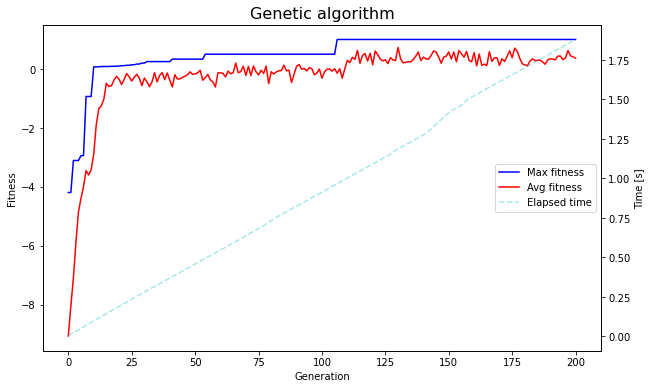

In [13]:
pop, log, hof = genetic_tournament(evalMazeEuclidean)
gen, avg, min_, max_, time_ = log.select("gen", "avg", "min", "max", "time")
exec_time_euclidean_TRNM = round(time_[-1], 4)
eucl_data_TRNM = chromosomeToData(hof[0])

moves = eucl_data_TRNM[0]
movesCount = eucl_data_TRNM[1]

time_best = round(time_[max_.index(np.max(max_))], 4)

print('-----------------------------------------------------')
print("Best individual is: %s\nwhich are moves: %s \ntotal score: %s\ntotal moves: %s" 
      % (hof[0], moves, hof[0].fitness, movesCount))
print("Found end:", eucl_data_TRNM[2] )
print("Time to best individual: ", time_best, " seconds")
print("------------------ %s seconds -------------------" % exec_time_euclidean_TRNM)


fig, ax1 = plt.subplots(figsize=(10, 6))
avg_line = ax1.plot(gen, avg, "r-", label="Avg fitness")
max_line = ax1.plot(gen, max_, "b-", label="Max fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="k")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, time_, "c--", label="Elapsed time", alpha=0.35)
ax2.set_ylabel("Time [s]", color="k")

lns = max_line + avg_line + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")
plt.title("Genetic algorithm", fontdict={'fontsize': 16})
plt.show()

-----------------------------------------------------
Best individual is: [3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 1, 3, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 3, 3, 2, 3, 0, 0, 2, 2, 2, 0]
which are moves: ['RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'DOWN'] 
total score: (1.0,)
total moves: 20
Found end: True
Time to best individual:  1.0408  seconds
------------------ 1.8354 seconds -------------------


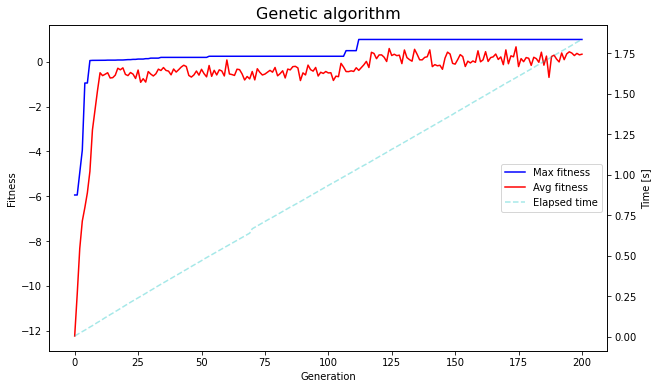

In [14]:
pop, log, hof = genetic_tournament(evalMazeTaxicab)
gen, avg, min_, max_, time_ = log.select("gen", "avg", "min", "max", "time")
exec_time_taxicab_TRNM = round(time_[-1], 4)
taxicab_data_TRNM = chromosomeToData(hof[0])

moves = taxicab_data_TRNM[0]
movesCount = taxicab_data_TRNM[1]

time_best = round(time_[max_.index(np.max(max_))], 4)

print('-----------------------------------------------------')
print("Best individual is: %s\nwhich are moves: %s \ntotal score: %s\ntotal moves: %s" 
      % (hof[0], moves, hof[0].fitness, movesCount))
print("Found end:", taxicab_data_TRNM[2] )
print("Time to best individual: ", time_best, " seconds")
print("------------------ %s seconds -------------------" % exec_time_taxicab_TRNM)


fig, ax1 = plt.subplots(figsize=(10, 6))
avg_line = ax1.plot(gen, avg, "r-", label="Avg fitness")
max_line = ax1.plot(gen, max_, "b-", label="Max fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="k")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, time_, "c--", label="Elapsed time", alpha=0.35)
ax2.set_ylabel("Time [s]", color="k")

lns = max_line + avg_line + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")
plt.title("Genetic algorithm", fontdict={'fontsize': 16})
plt.show()

## Elityzm
---

In [15]:
def genetic_elitism(fitness_func):
    toolbox.register("evaluate", fitness_func)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutUniformInt, low=0, up=4, indpb=0.1) 
    toolbox.register("select", tools.selBest)

    import numpy
    pop = toolbox.population(n=200) # generate population of 300
    hof = tools.HallOfFame(1) # get the best individual
    start_time = time.time()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    stats.register("time", lambda t: time.time() - start_time)

    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=30, lambda_ = 300, cxpb=0.5, mutpb=0.2, 
                                              ngen=100, stats=stats, halloffame=hof, verbose=False)
    
    return pop, logbook, hof

---

-----------------------------------------------------
Best individual is: [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 3, 3, 0, 1, 0, 3, 3, 2, 0, 2, 2, 2, 0, 2, 3, 3, 2, 3, 0, 2, 2, 0, 2]
which are moves: ['RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'DOWN'] 
total score: (1.0,)
total moves: 20
Found end: True
Time to best individual:  0.7468  seconds
------------------ 1.5625 seconds -------------------


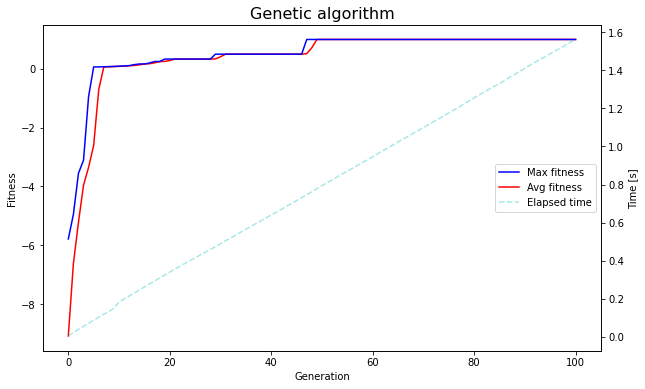

In [16]:
pop, log, hof = genetic_elitism(evalMazeEuclidean)
gen, avg, min_, max_, time_ = log.select("gen", "avg", "min", "max", "time")
exec_time_euclidean_EL = round(time_[-1], 4)
eucl_data_EL = chromosomeToData(hof[0])

moves = eucl_data_EL[0]
movesCount = eucl_data_EL[1]

time_best = round(time_[max_.index(np.max(max_))], 4)

print('-----------------------------------------------------')
print("Best individual is: %s\nwhich are moves: %s \ntotal score: %s\ntotal moves: %s" 
      % (hof[0], moves, hof[0].fitness, movesCount))
print("Found end:", eucl_data_EL[2] )
print("Time to best individual: ", time_best, " seconds")
print("------------------ %s seconds -------------------" % exec_time_euclidean_EL)


fig, ax1 = plt.subplots(figsize=(10, 6))
avg_line = ax1.plot(gen, avg, "r-", label="Avg fitness")
max_line = ax1.plot(gen, max_, "b-", label="Max fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="k")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, time_, "c--", label="Elapsed time", alpha=0.35)
ax2.set_ylabel("Time [s]", color="k")

lns = max_line + avg_line + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")
plt.title("Genetic algorithm", fontdict={'fontsize': 16})
plt.show()

-----------------------------------------------------
Best individual is: [0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 2, 2, 0, 0, 2, 2, 2, 0, 3, 0, 3, 2, 0, 3, 2, 2, 2]
which are moves: ['RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'DOWN'] 
total score: (1.0,)
total moves: 20
Found end: True
Time to best individual:  0.5293  seconds
------------------ 1.5506 seconds -------------------


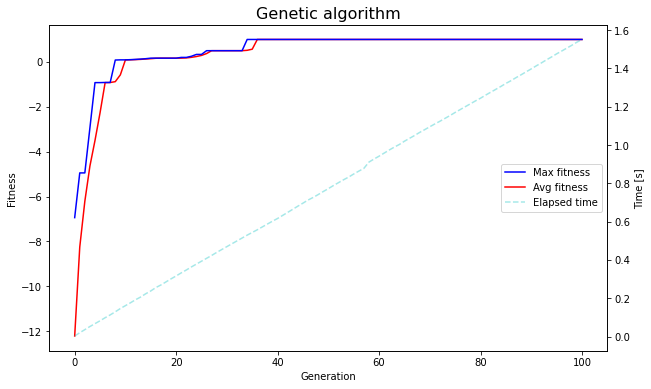

In [17]:
pop, log, hof = genetic_elitism(evalMazeTaxicab)
gen, avg, min_, max_, time_ = log.select("gen", "avg", "min", "max", "time")
exec_time_taxicab_EL = round(time_[-1], 4)
taxicab_data_EL = chromosomeToData(hof[0])

moves = taxicab_data_EL[0]
movesCount = taxicab_data_EL[1]

time_best = round(time_[max_.index(np.max(max_))], 4)

print('-----------------------------------------------------')
print("Best individual is: %s\nwhich are moves: %s \ntotal score: %s\ntotal moves: %s" 
      % (hof[0], moves, hof[0].fitness, movesCount))
print("Found end:", taxicab_data_EL[2] )
print("Time to best individual: ", time_best, " seconds")
print("------------------ %s seconds -------------------" % exec_time_taxicab_EL)


fig, ax1 = plt.subplots(figsize=(10, 6))
avg_line = ax1.plot(gen, avg, "r-", label="Avg fitness")
max_line = ax1.plot(gen, max_, "b-", label="Max fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="k")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, time_, "c--", label="Elapsed time", alpha=0.35)
ax2.set_ylabel("Time [s]", color="k")

lns = max_line + avg_line + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")
plt.title("Genetic algorithm", fontdict={'fontsize': 16})
plt.show()

# Podsumowanie
---

In [18]:
import pandas as pd
algs = ["BFS", "Brute force", "Genetic eucl. TRNM", "Genetic taxi. TRNM", "Genetic eucl. EL", "Genetic taxi. EL"]
exec_times = [exec_time_bfs, brute_exec_time, exec_time_euclidean_TRNM, exec_time_taxicab_TRNM, exec_time_euclidean_EL, exec_time_taxicab_EL]
founds = [True, found_brute, eucl_data_TRNM[2], taxicab_data_TRNM[2], eucl_data_EL[2], taxicab_data_EL[2]]
data = {
    "time": exec_times,
    "found": founds
}
df = pd.DataFrame(data, index=algs)
df

,time,found
BFS,0.012900,True
Brute force,12.495047,False
Genetic eucl. TRNM,1.879900,True
Genetic taxi. TRNM,1.835400,True
Genetic eucl. EL,1.562500,True
Genetic taxi. EL,1.550600,True
